In [ ]:
import pandas as pd 
import nltk 
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
# Import re is regular expressions
import re
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('fivethirtyeight')

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.util import ngrams
nltk.download('punkt')



import warnings
warnings.filterwarnings("ignore")


import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams
from nltk import FreqDist



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:

from google.colab import files
uploaded = files.upload()


Saving digitalnomad_comments_1420066800.csv to digitalnomad_comments_1420066800.csv


In [ ]:
df = pd.read_csv("digitalnomad_comments_1420066800.csv")


In [ ]:
df.shape

(25147, 24)

In [ ]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [ ]:
def clean(text_):

  text = text_
  #text = ' '.join([w.lower() for w in word_tokenize(text)])
  #text = [word for word in text if word not in stopwords]
  #text = re.sub('<[^<]+?>','', text)
  text = ''.join(c for c in text if not c.isdigit())
  text = ''.join(c for c in text if c not in punctuation)

  wordnet_lemmatizer = WordNetLemmatizer()
  
  word_tokens = nltk.word_tokenize(text)
  lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]

  #text = nltk.word_tokenize(text)
  
  return lemmatized_word

In [ ]:
df.head()

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,id,link_id,nest_level,parent_id,reply_delay,retrieved_on,score,score_hidden,subreddit,subreddit_id,user_removed,edited,mod_removed,stickied
0,nateliason,1.384809e+09,NaN,NaN,t2_dz1sa,"Great! Head over to millennialnomads.com, plug...",0,1426370466,NaN,0,cpf0nc7,t3_2yxxuq,2.0,t1_cpexcey,6720.0,1.427764e+09,1,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN
1,Gekko463,1.387088e+09,NaN,NaN,t2_ed0aw,They won't let you. Only at renewal.,0,1426369733,NaN,0,cpf0ash,t3_2ymou9,4.0,t1_cpewdsm,7965.0,1.427764e+09,1,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN
2,[deleted],NaN,NaN,NaN,NaN,[deleted],0,1426369250,NaN,0,cpf02kj,t3_2z0dzh,1.0,t3_2z0dzh,36742.0,1.427763e+09,1,False,digitalnomad,t5_2r9w0,True,NaN,NaN,NaN
3,Topiary_goat,1.425463e+09,NaN,NaN,t2_lvdut,I've always considered expats to be those who ...,0,1426368233,NaN,0,cpezkna,t3_2z1mil,1.0,t3_2z1mil,8598.0,1.427763e+09,6,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN
4,scottkeyes,1.375214e+09,NaN,NaN,t2_cki8c,just standard index &amp; lifecycle funds. dil...,0,1426364785,NaN,0,cpexumy,t3_2z02d0,3.0,t1_cpet9nq,9235.0,1.427762e+09,5,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN


In [ ]:
#df.drop(df.iloc[:, 1:5], inplace = True, axis = 1)

In [ ]:
df.head()

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,id,link_id,nest_level,parent_id,reply_delay,retrieved_on,score,score_hidden,subreddit,subreddit_id,user_removed,edited,mod_removed,stickied
0,nateliason,1.384809e+09,NaN,NaN,t2_dz1sa,"Great! Head over to millennialnomads.com, plug...",0,1426370466,NaN,0,cpf0nc7,t3_2yxxuq,2.0,t1_cpexcey,6720.0,1.427764e+09,1,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN
1,Gekko463,1.387088e+09,NaN,NaN,t2_ed0aw,They won't let you. Only at renewal.,0,1426369733,NaN,0,cpf0ash,t3_2ymou9,4.0,t1_cpewdsm,7965.0,1.427764e+09,1,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN
2,[deleted],NaN,NaN,NaN,NaN,[deleted],0,1426369250,NaN,0,cpf02kj,t3_2z0dzh,1.0,t3_2z0dzh,36742.0,1.427763e+09,1,False,digitalnomad,t5_2r9w0,True,NaN,NaN,NaN
3,Topiary_goat,1.425463e+09,NaN,NaN,t2_lvdut,I've always considered expats to be those who ...,0,1426368233,NaN,0,cpezkna,t3_2z1mil,1.0,t3_2z1mil,8598.0,1.427763e+09,6,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN
4,scottkeyes,1.375214e+09,NaN,NaN,t2_cki8c,just standard index &amp; lifecycle funds. dil...,0,1426364785,NaN,0,cpexumy,t3_2z02d0,3.0,t1_cpet9nq,9235.0,1.427762e+09,5,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN


In [ ]:
#df.drop(df.iloc[:, 4:6], inplace = True, axis = 1)
#df.drop(df.iloc[:, 6:8], inplace = True, axis = 1)

In [ ]:
df.columns

Index(['author', 'author_created_utc', 'author_flair_css_class',
       'author_flair_text', 'author_fullname', 'body', 'controversiality',
       'created_utc', 'distinguished', 'gilded', 'id', 'link_id', 'nest_level',
       'parent_id', 'reply_delay', 'retrieved_on', 'score', 'score_hidden',
       'subreddit', 'subreddit_id', 'user_removed', 'edited', 'mod_removed',
       'stickied'],
      dtype='object')

In [ ]:
df1 = df[['author', 'body' ,'id','created_utc']]

In [ ]:
df1.dropna()

,author,body,id,created_utc
0,nateliason,"Great! Head over to millennialnomads.com, plug...",cpf0nc7,1426370466
1,Gekko463,They won't let you. Only at renewal.,cpf0ash,1426369733
2,[deleted],[deleted],cpf02kj,1426369250
3,Topiary_goat,I've always considered expats to be those who ...,cpezkna,1426368233
4,scottkeyes,just standard index &amp; lifecycle funds. dil...,cpexumy,1426364785
...,...,...,...,...
25142,thunder_cougar,I've also been doing the Beginner Routine. I'm...,cuggcs6,1440609220
25143,ZyklusDieWelt,"&gt; Nowhere in my previous comments was I ""sh...",cugg50w,1440608896
25144,fortist,"I'm getting 5-10 mbit/sec upload with 4G, but ...",cugfkxb,1440608052
25145,Yousernamed,It's a shame you are getting upset. I thought ...,cugfcyg,1440607724


In [ ]:
#changing dtype of df1 to string and making a copy of the dataframe
type(clean(df1.body[0]))
df1.body = df1.body.astype(str)


In [ ]:
count = 0
df1.dropna()

#df1 = df1.drop(labels=2, axis=0)

for i in range (len(df1)):
  df1.body[i] = clean(df1.body[i])
  
  
  


 

In [ ]:
df1.shape

(25147, 4)

In [ ]:


for i in range(len(df1.body)) :
  try:
    if( len(df1.body[i][0]) == 7 ):
      
      df1 = df1.drop(index=df1.index[[i]])
    if (len(df1.body[i]) < 3):
      df1 = df1.drop(index=df1.index[[i]])
       
       #df1.drop(label=["[deleted]"], inplace = True)
       #df1.drop(index=df1.index[[i]])
    
  except:
    x=0




df2 = df1.copy()



In [ ]:
df1.shape

(22168, 4)

In [ ]:
#ls = {}
#for i in range (len(df.body)):
#  ls[i]= (clean(df.body[i]))
#print(type(clean(df.body[i])))
#df1.drop(index=df1.index[[2]])

df2.head()
df3 = df2[["author","body","id","created_utc"]]
#df3 = df1.drop(index=df1.index[[2]])
df3.head()

,author,body,id,created_utc
0,nateliason,"[Great, Head, over, to, millennialnomadscom, p...",cpf0nc7,1426370466
1,Gekko463,"[They, wont, let, you, Only, at, renewal]",cpf0ash,1426369733
3,Topiary_goat,"[Ive, always, considered, expat, to, be, those...",cpezkna,1426368233
4,scottkeyes,"[just, standard, index, amp, lifecycle, fund, ...",cpexumy,1426364785
5,MsKim,"[Dumb, race, baiting, article, Expats, are, no...",cpexrld,1426364611


In [ ]:

df3 = df3.reset_index(drop="True")
df3.head()

,author,body,id,created_utc
0,nateliason,"[Great, Head, over, to, millennialnomadscom, p...",cpf0nc7,1426370466
1,Gekko463,"[They, wont, let, you, Only, at, renewal]",cpf0ash,1426369733
2,Topiary_goat,"[Ive, always, considered, expat, to, be, those...",cpezkna,1426368233
3,scottkeyes,"[just, standard, index, amp, lifecycle, fund, ...",cpexumy,1426364785
4,MsKim,"[Dumb, race, baiting, article, Expats, are, no...",cpexrld,1426364611


In [ ]:

df2 =  df2.reset_index(drop=True)
df2.head()

,author,body,id,created_utc
0,nateliason,"[Great, Head, over, to, millennialnomadscom, p...",cpf0nc7,1426370466
1,Gekko463,"[They, wont, let, you, Only, at, renewal]",cpf0ash,1426369733
2,Topiary_goat,"[Ive, always, considered, expat, to, be, those...",cpezkna,1426368233
3,scottkeyes,"[just, standard, index, amp, lifecycle, fund, ...",cpexumy,1426364785
4,MsKim,"[Dumb, race, baiting, article, Expats, are, no...",cpexrld,1426364611


In [ ]:
df1 =  df1.reset_index(drop=True)

df1.body
tagged =  {}

In [ ]:
for i in range (len(df1)):
  tagged[i] = nltk.pos_tag(df1.body[i])

In [ ]:
type(tagged)

dict

In [ ]:
#tagged

In [ ]:
df1.body[0]

['Great',
 'Head',
 'over',
 'to',
 'millennialnomadscom',
 'plug',
 'in',
 'your',
 'info',
 'and',
 'Ill',
 'add',
 'you']

In [ ]:
def get_tweet_sentiment(self):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'



In [ ]:
df1.body.dropna

<bound method Series.dropna of 0        [Great, Head, over, to, millennialnomadscom, p...
1                [They, wont, let, you, Only, at, renewal]
2        [Ive, always, considered, expat, to, be, those...
3        [just, standard, index, amp, lifecycle, fund, ...
4        [Dumb, race, baiting, article, Expats, are, no...
                               ...                        
22163    [Disagree, Ive, got, Mbit, updown, at, my, pla...
22164    [I, like, your, new, tangent, and, agree, with...
22165    [gt, Nowhere, in, my, previous, comment, wa, I...
22166    [Im, getting, mbitsec, upload, with, G, but, i...
22167    [I, havent, bashed, a, programmer, yet, just, ...
Name: body, Length: 22168, dtype: object>

In [ ]:
df2.body

0        [Great, Head, over, to, millennialnomadscom, p...
1                [They, wont, let, you, Only, at, renewal]
2        [Ive, always, considered, expat, to, be, those...
3        [just, standard, index, amp, lifecycle, fund, ...
4        [Dumb, race, baiting, article, Expats, are, no...
                               ...                        
22163    [Disagree, Ive, got, Mbit, updown, at, my, pla...
22164    [I, like, your, new, tangent, and, agree, with...
22165    [gt, Nowhere, in, my, previous, comment, wa, I...
22166    [Im, getting, mbitsec, upload, with, G, but, i...
22167    [I, havent, bashed, a, programmer, yet, just, ...
Name: body, Length: 22168, dtype: object

In [ ]:
df2.body = df2.body.astype(str)
ls = []
for i in range(len(df2)):
  ls.append(get_tweet_sentiment(df2.body[i]))
df2['sentiment'] = ls

  



  

In [ ]:
df2.shape


(22168, 5)

In [ ]:
!pip install rake-nltk

from rake_nltk import Rake

r = Rake() # Uses stopwords for english from NLTK, and all puntuation characters.




In [ ]:
def key(text):
  r.extract_keywords_from_text(text)
  tss = r.get_ranked_phrases() # To get keyword phrases ranked highest to lowest.
  return tss[0] 

In [ ]:
df1.body = df1.body.astype(str)
ls = []
for i in range (len(df1)):
  ls.append(key(df1.body[i]))

In [ ]:
for i in range (len(ls)) :
  ls[i] = clean(ls[i])

In [ ]:
df1.head()

,author,body,id,created_utc
0,nateliason,"['Great', 'Head', 'over', 'to', 'millennialnom...",cpf0nc7,1426370466
1,Gekko463,"['They', 'wont', 'let', 'you', 'Only', 'at', '...",cpf0ash,1426369733
2,Topiary_goat,"['Ive', 'always', 'considered', 'expat', 'to',...",cpezkna,1426368233
3,scottkeyes,"['just', 'standard', 'index', 'amp', 'lifecycl...",cpexumy,1426364785
4,MsKim,"['Dumb', 'race', 'baiting', 'article', 'Expats...",cpexrld,1426364611


In [ ]:
df1['key_topic'] = ls
df1['taggedW'] = tagged
df1['sentiment'] = df2['sentiment']

In [ ]:

#trying to delete the [deleted] list length 11
len(df1.body[2])
for i in range (len(df1)):
  if (len(df1.body[i]) == 7 ):
    df1 = df1.drop([df.index[i]])

In [ ]:
df1.head()

,author,body,id,created_utc,key_topic,taggedW,sentiment
0,nateliason,"['Great', 'Head', 'over', 'to', 'millennialnom...",cpf0nc7,1426370466,[great],0,positive
1,Gekko463,"['They', 'wont', 'let', 'you', 'Only', 'at', '...",cpf0ash,1426369733,[renewal],1,neutral
2,Topiary_goat,"['Ive', 'always', 'considered', 'expat', 'to',...",cpezkna,1426368233,[ive],2,positive
3,scottkeyes,"['just', 'standard', 'index', 'amp', 'lifecycl...",cpexumy,1426364785,[year],3,negative
4,MsKim,"['Dumb', 'race', 'baiting', 'article', 'Expats...",cpexrld,1426364611,[dumb],4,negative


In [ ]:
df2.head()

,author,body,id,created_utc,sentiment
0,nateliason,"['Great', 'Head', 'over', 'to', 'millennialnom...",cpf0nc7,1426370466,positive
1,Gekko463,"['They', 'wont', 'let', 'you', 'Only', 'at', '...",cpf0ash,1426369733,neutral
2,Topiary_goat,"['Ive', 'always', 'considered', 'expat', 'to',...",cpezkna,1426368233,positive
3,scottkeyes,"['just', 'standard', 'index', 'amp', 'lifecycl...",cpexumy,1426364785,negative
4,MsKim,"['Dumb', 'race', 'baiting', 'article', 'Expats...",cpexrld,1426364611,negative


In [ ]:
#We calculate the number of words in each tweet and look at the length distribution.
lens = df2.body.str.split().apply(lambda x: len(x))
print(lens.describe())


count    22168.000000
mean        53.569605
std         73.717186
min          1.000000
25%         12.000000
50%         31.000000
75%         65.000000
max       1715.000000
Name: body, dtype: float64


In [ ]:
df1.head()
### sentiment ANalysis , You can see key topic modelling by using Rake

,author,body,id,created_utc,key_topic,taggedW,sentiment
0,nateliason,"['Great', 'Head', 'over', 'to', 'millennialnom...",cpf0nc7,1426370466,[great],0,positive
1,Gekko463,"['They', 'wont', 'let', 'you', 'Only', 'at', '...",cpf0ash,1426369733,[renewal],1,neutral
2,Topiary_goat,"['Ive', 'always', 'considered', 'expat', 'to',...",cpezkna,1426368233,[ive],2,positive
3,scottkeyes,"['just', 'standard', 'index', 'amp', 'lifecycl...",cpexumy,1426364785,[year],3,negative
4,MsKim,"['Dumb', 'race', 'baiting', 'article', 'Expats...",cpexrld,1426364611,[dumb],4,negative


In [ ]:
df2.head()
df2["retrieved_on"] = df2["author"]

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer

from nltk.tokenize import word_tokenize


from nltk.corpus import words
nltk.download('words')




my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'


def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet
def cleanTxt(tweet, bigrams=False):


    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    final = []

    for x in tweet_token_list:
      if x in words.words():
        final.append(x)
    tweet_token_list = final

    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet



df2.retrieved_on= df1.body.apply(cleanTxt)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
df2.retrieved_on

0         great head millennialnomadscom plug info ill ...
1                                          wont let renew 
2         ive alway consid expat live anoth countri cer...
3         standard index amp lifecycl fund dilig max ir...
4         dumb race bait articl expat matter color peop...
                               ...                        
22163     disagre ive got mbit updown place bangkok con...
22164     like new tangent agre uthegrinchofsr pivot go...
22165     gt nowher previou comment wa shit idea dont k...
22166     im get mbitsec upload g widespread yet mani c...
22167     havent bash programm yet abysm attitud respec...
Name: retrieved_on, Length: 22168, dtype: object

In [ ]:
df2.retrieved_on = df2.retrieved_on.astype(str)

In [ ]:
df2.retrieved_on[0]

' great head millennialnomadscom plug info ill add '

In [ ]:

cln = df2.retrieved_on

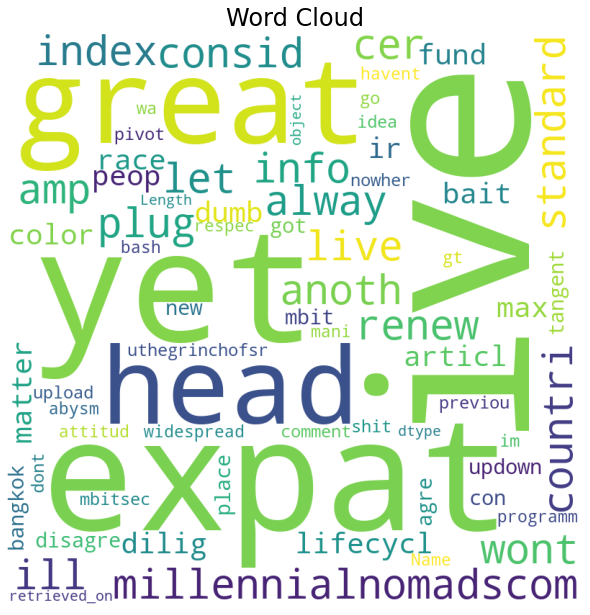

In [ ]:

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 

def worldcloud_(listd,str_):
  wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(str(listd)) 


  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.title (str_, size=24)
  plt.show() 

worldcloud_(cln, "Word Cloud")


In [ ]:
import matplotlib.pyplot as plt

cln = [' '.join(cln)]
listToStr = ' '.join(map(str, cln))   


def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]




In [ ]:
#

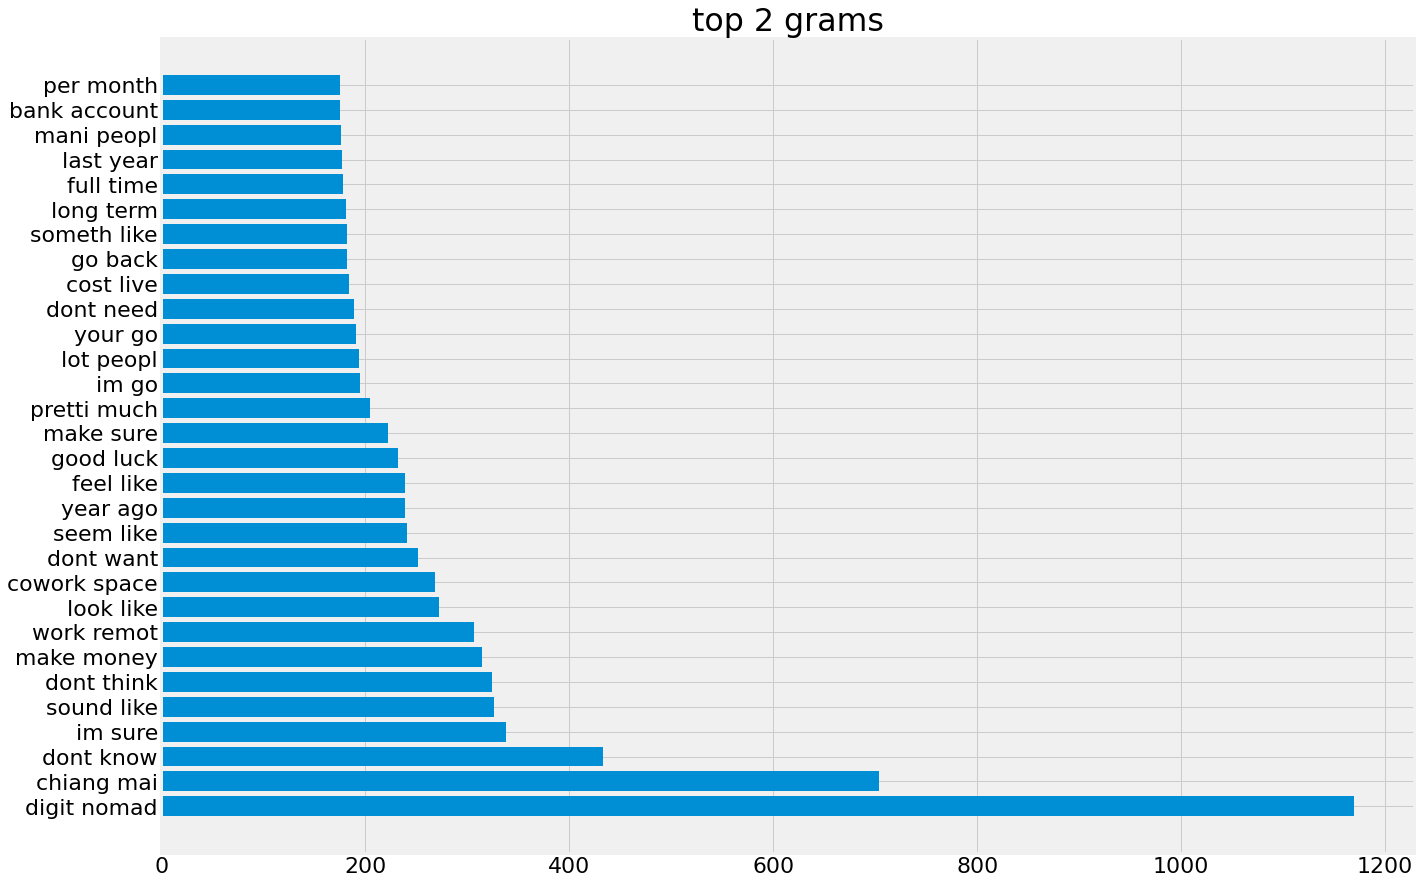

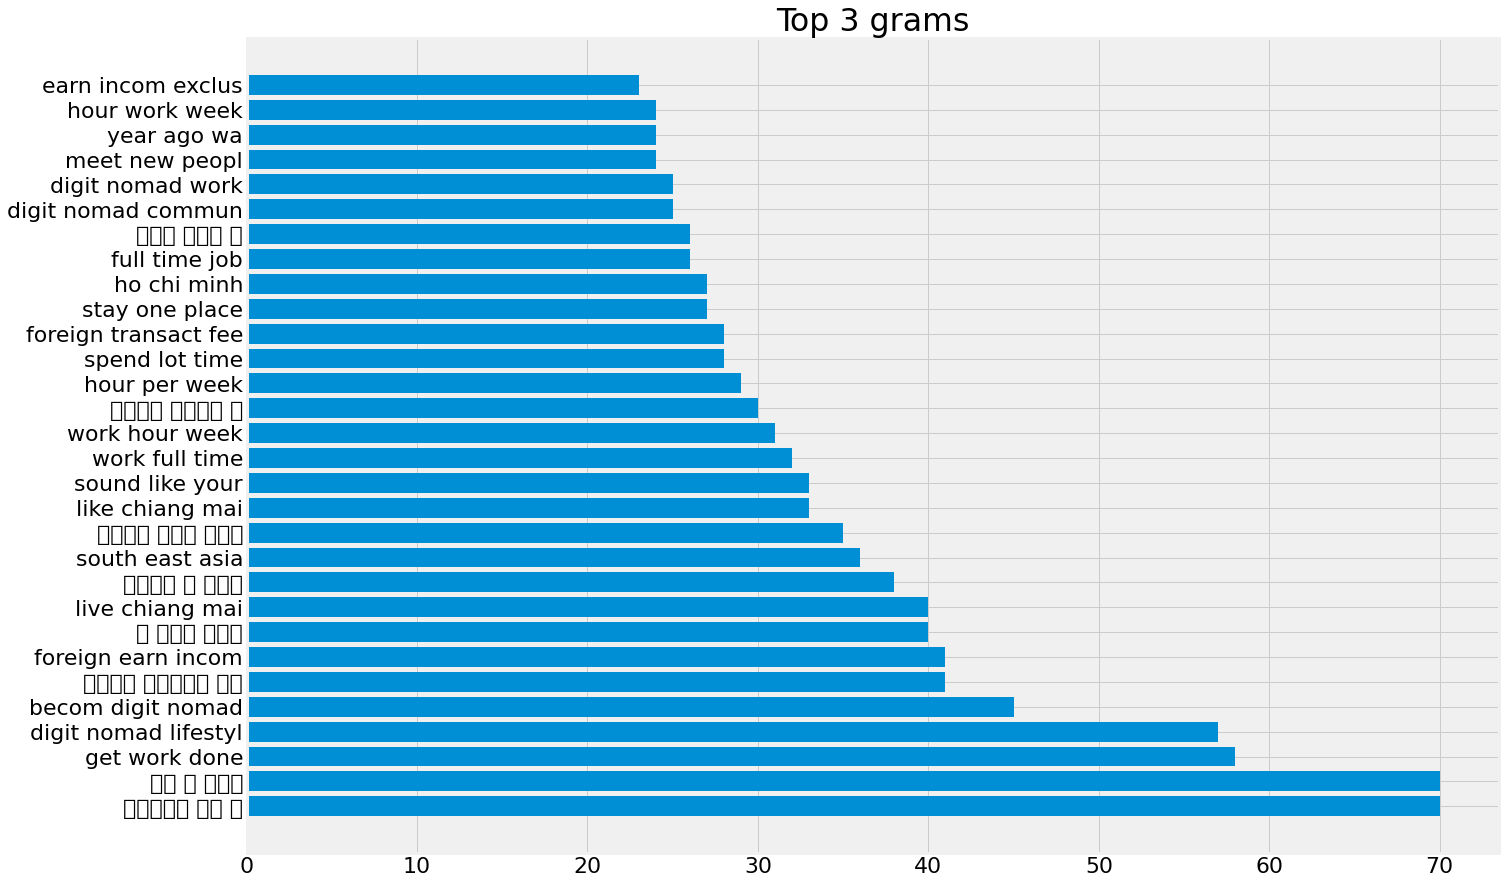

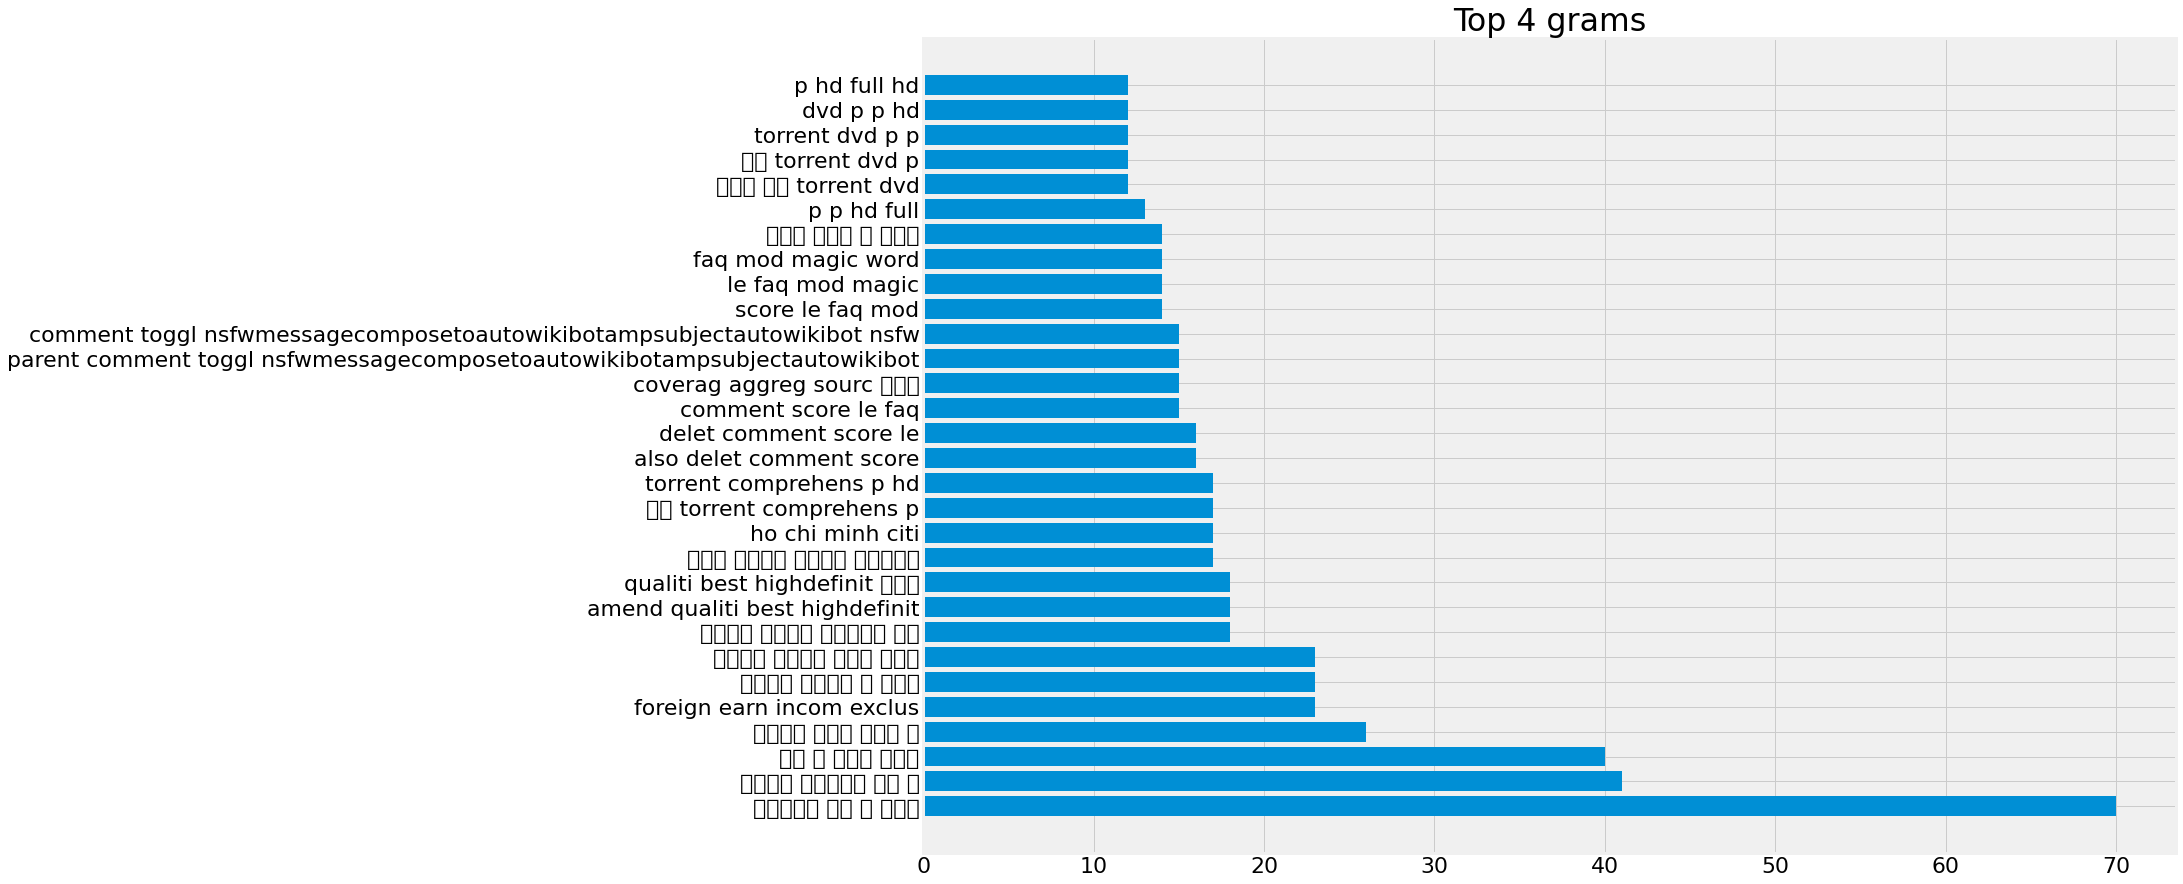

In [ ]:
def grams3(lts,str_):
  onegram = ("1-gram: ", extract_ngrams(lts, 1))
  twogram = ("2-gram: ", extract_ngrams(lts, 2))
  threegram = ("3-gram: ", extract_ngrams(lts, 3))
  fourgram = ("4-gram: ", extract_ngrams(lts, 4))

  unigramFreq = collections.Counter(list(onegram[1]))
  trigramFreq = collections.Counter(list(threegram[1]))
  bigramFreq = collections.Counter(list(twogram[1]))
  quadgramFreq = collections.Counter(list(fourgram[1]))
  quadgramFreq.most_common(10)
  top30 = bigramFreq.most_common(30)
  top30quad = quadgramFreq.most_common(30)
  top30uni = unigramFreq.most_common(30)
  top30tri = trigramFreq.most_common(30)
  top30qtri  = [list(elem) for elem in top30tri]
  xs, ys = [*zip(*top30)]
  plt.figure(figsize=(20,15), )
  plt.rcParams.update({'font.size': 22})
  plt.barh(xs,ys)
  plt.title (str_)

  xs, ys = [*zip(*top30tri)]
  plt.figure(figsize=(20,15), )
  plt.rcParams.update({'font.size': 22})
  plt.barh(xs,ys)
  plt.title ("Top 3 grams")


  xs, ys = [*zip(*top30quad)]
  plt.figure(figsize=(20,15), )
  plt.rcParams.update({'font.size': 22})
  plt.barh(xs,ys)
  plt.title ("Top 4 grams")






grams3(listToStr,"top 2 grams")

In [ ]:
df2.head() 
fss = []
for i in range(len(df2)):
  fss.append(df2.body[i])

In [ ]:
import spacy
nlp = spacy.load('en')
named = []

  


#print([ent for ent in named])

In [ ]:
for i in fss :
  named.append(i)

In [ ]:
len(named)

23406

In [ ]:
df2.head()

,author,body,id,created_utc,sentiment,retrieved_on
0,nateliason,"['Great', 'Head', 'over', 'to', 'millennialnom...",cpf0nc7,1426370466,positive,great head millennialnomadscom plug info ill ...
1,Gekko463,"['They', 'wont', 'let', 'you', 'Only', 'at', '...",cpf0ash,1426369733,neutral,wont let renew
2,Topiary_goat,"['Ive', 'always', 'considered', 'expat', 'to',...",cpezkna,1426368233,positive,ive alway consid expat live anoth countri cer...
3,scottkeyes,"['just', 'standard', 'index', 'amp', 'lifecycl...",cpexumy,1426364785,negative,standard index amp lifecycl fund dilig max ir...
4,MsKim,"['Dumb', 'race', 'baiting', 'article', 'Expats...",cpexrld,1426364611,negative,dumb race bait articl expat matter color peop...


In [ ]:
import itertools
all_words_no_urls = list(itertools.chain(*named))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(30)

[("'", 2333724),
 (',', 1144995),
 (' ', 1144995),
 ('e', 576810),
 ('t', 461911),
 ('o', 434578),
 ('a', 402003),
 ('n', 351106),
 ('i', 333531),
 ('r', 284721),
 ('s', 222541),
 ('h', 220448),
 ('l', 214670),
 ('d', 169562),
 ('u', 166645),
 ('c', 134161),
 ('y', 133069),
 ('m', 128823),
 ('g', 116103),
 ('p', 105541),
 ('f', 102421),
 ('w', 97660),
 ('b', 78905),
 ('v', 57967),
 ('k', 57775),
 ('I', 47387),
 ('[', 21902),
 (']', 21902),
 ('T', 15314),
 ('x', 11857)]

In [ ]:
rss =[]
df2['ner'] = df2.id

In [ ]:


'''
for i in range(len(named)):
  doc = nlp(named[i])
  df2.ner[i] = [ent for ent in doc]

'''
  


'\nfor i in range(len(named)):\n  doc = nlp(named[i])\n  df2.ner[i] = [ent for ent in doc]\n\n'

In [ ]:
df.head()

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,id,link_id,nest_level,parent_id,reply_delay,retrieved_on,score,score_hidden,subreddit,subreddit_id,user_removed,edited,mod_removed,stickied
0,nateliason,1.384809e+09,NaN,NaN,t2_dz1sa,"Great! Head over to millennialnomads.com, plug...",0,1426370466,NaN,0,cpf0nc7,t3_2yxxuq,2.0,t1_cpexcey,6720.0,1.427764e+09,1,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN
1,Gekko463,1.387088e+09,NaN,NaN,t2_ed0aw,They won't let you. Only at renewal.,0,1426369733,NaN,0,cpf0ash,t3_2ymou9,4.0,t1_cpewdsm,7965.0,1.427764e+09,1,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN
2,[deleted],NaN,NaN,NaN,NaN,[deleted],0,1426369250,NaN,0,cpf02kj,t3_2z0dzh,1.0,t3_2z0dzh,36742.0,1.427763e+09,1,False,digitalnomad,t5_2r9w0,True,NaN,NaN,NaN
3,Topiary_goat,1.425463e+09,NaN,NaN,t2_lvdut,I've always considered expats to be those who ...,0,1426368233,NaN,0,cpezkna,t3_2z1mil,1.0,t3_2z1mil,8598.0,1.427763e+09,6,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN
4,scottkeyes,1.375214e+09,NaN,NaN,t2_cki8c,just standard index &amp; lifecycle funds. dil...,0,1426364785,NaN,0,cpexumy,t3_2z02d0,3.0,t1_cpet9nq,9235.0,1.427762e+09,5,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np

reviews_datasets = df
reviews_datasets.dropna()

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,id,link_id,nest_level,parent_id,reply_delay,retrieved_on,score,score_hidden,subreddit,subreddit_id,user_removed,edited,mod_removed,stickied


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(reviews_datasets['body'].values.astype('U'))

In [ ]:
doc_term_matrix

<25147x16740 sparse matrix of type '<class 'numpy.int64'>'
	with 537541 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation( random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

declines
escapism
littlehelperrobot
members
factored
dk
wedding
seekers
20miles
leap


In [ ]:
first_topic = LDA.components_[0]

In [ ]:
top_topic_words = first_topic.argsort()[-10:]

In [ ]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

think
really
good
ve
time
don
people
work
like
just


In [ ]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['think', 'really', 'good', 've', 'time', 'don', 'people', 'work', 'like', 'just']




In [ ]:
topic_values = LDA.transform(doc_term_matrix)


In [ ]:
topic_values.shape

(25147, 1)

In [ ]:
reviews_datasets['Topic'] = topic_values

In [ ]:
reviews_datasets.Topic

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
25142    1.0
25143    1.0
25144    1.0
25145    1.0
25146    1.0
Name: Topic, Length: 25147, dtype: float64

In [ ]:
reviews_datasets.head()

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,id,link_id,nest_level,parent_id,reply_delay,retrieved_on,score,score_hidden,subreddit,subreddit_id,user_removed,edited,mod_removed,stickied,Topic
0,nateliason,1.384809e+09,NaN,NaN,t2_dz1sa,"Great! Head over to millennialnomads.com, plug...",0,1426370466,NaN,0,cpf0nc7,t3_2yxxuq,2.0,t1_cpexcey,6720.0,1.427764e+09,1,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN,3
1,Gekko463,1.387088e+09,NaN,NaN,t2_ed0aw,They won't let you. Only at renewal.,0,1426369733,NaN,0,cpf0ash,t3_2ymou9,4.0,t1_cpewdsm,7965.0,1.427764e+09,1,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN,0
2,[deleted],NaN,NaN,NaN,NaN,[deleted],0,1426369250,NaN,0,cpf02kj,t3_2z0dzh,1.0,t3_2z0dzh,36742.0,1.427763e+09,1,False,digitalnomad,t5_2r9w0,True,NaN,NaN,NaN,3
3,Topiary_goat,1.425463e+09,NaN,NaN,t2_lvdut,I've always considered expats to be those who ...,0,1426368233,NaN,0,cpezkna,t3_2z1mil,1.0,t3_2z1mil,8598.0,1.427763e+09,6,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN,0
4,scottkeyes,1.375214e+09,NaN,NaN,t2_cki8c,just standard index &amp; lifecycle funds. dil...,0,1426364785,NaN,0,cpexumy,t3_2z02d0,3.0,t1_cpet9nq,9235.0,1.427762e+09,5,False,digitalnomad,t5_2r9w0,NaN,NaN,NaN,NaN,0


In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx , topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words -1:-1]]))

In [ ]:
#print([ent for ent in named])
#tm = [ent for ent in doc]



In [ ]:
#print(tm)